<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks with Tensorflow



In [1]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

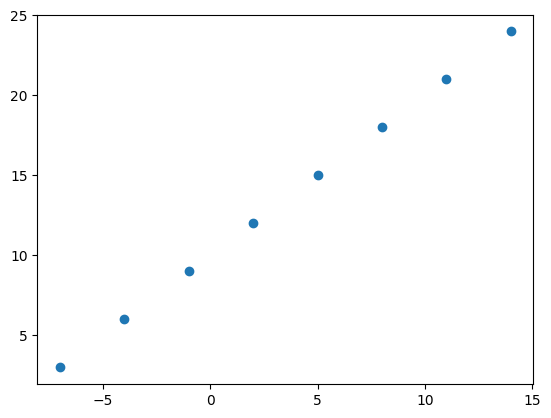

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [3]:
y == X + 10 #A relationship we are trying our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price problems
house_info = tf.constant(["bedrooms","bathroom","garage"])
house_price = tf.constant([939700])
house_info,  house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0] #we want X[0] to predict y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
X[0],y[0]

(-7.0, 3.0)

In [9]:
# Turn our numpy arrays to tensors with dtype float 32 
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

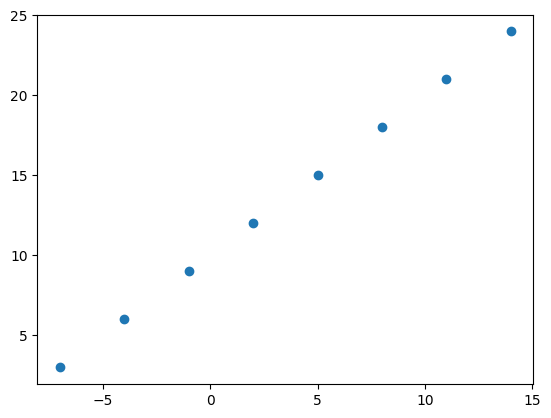

In [11]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow

1. **Creating a model** -  defining the input and output layers, as well as the hidden layers of deep learning model
2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its leanring) and evaluation metrics (what we can use to interpret tge performance of our model)
3. Fitting the model - letting the model try to find patterns between X and y (Features and labels)

In [12]:
#Set a random seed
tf.random.set_seed(42) #for reproducability

#1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #one hidden layer with one hidden neuron.
    #we want model to take as input 1 number and predict one number
])

#2. Compile the model
#loss = mean(abs(y_true - y_pred),axis=1)
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]) #SGD is short for stochaistic gradient descent

#3. fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=5) #model will try and figure out patttern between x and y 5 times


Epoch 1/5
1/1 [==============================] - 1s 671ms/step - loss: 11.2266 - mae: 11.2266
Epoch 2/5
1/1 [==============================] - 0s 50ms/step - loss: 11.0941 - mae: 11.0941
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 10.9616 - mae: 10.9616
Epoch 4/5
1/1 [==============================] - 0s 33ms/step - loss: 10.8291 - mae: 10.8291
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 10.6966 - mae: 10.6966


In [13]:
#Check the X and y (lets predict now)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
#Try and make a perdiction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 272ms/step


array([[14.067252]], dtype=float32)

In [15]:
y_pred + 13

array([[27.067253]], dtype=float32)

## Improving our model

We can approve our model by altering the steps we took to create a model.

1. **Creating a model** - here we want to add more layers, or increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling the model** - here we might want to change the optimizing function or perhaps the **learning rate** of optimization function.

3. **Fitting the model** - here we might want ot fit the model for more epochs (leave it longer for training) or more data (give it more model examples to learn from)

In [16]:
## Let's rebuild our model

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (This time we will train longer)
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 760ms/step - loss: 8.1052 - mae: 8.1052
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 7.9727 - mae: 7.9727
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 7.8402 - mae: 7.8402
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 7.7077 - mae: 7.7077
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 7.5752 - mae: 7.5752
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4625 - mae: 7.4625
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4569 - mae: 7.4569
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 7.4513 - mae: 7.4513
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 7.4456 - mae: 7.4456
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4400 - mae: 7.4400
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - l

In [17]:
y_pred = model.predict([17.0])
y_pred #we are getting much closer prediction. (It must have been 27 but we get 29)

1/1 [==============================] - 0s 110ms/step


array([[29.940985]], dtype=float32)

In [18]:
# Lets see if we can make another change in getting a better model

#1. Create a model (This time with an extra hidden layer with an 100 hidden units(neurons))
model = tf.keras.Sequential([
    #earlier the activation was relu
    tf.keras.layers.Dense(100,activation=None), #one hidden layer
    tf.keras.layers.Dense(1) #outer output layer
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=1),y,epochs=100)
#We get even a better model with lesser loss


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3432 - mae: 13.3432
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 13.2476 - mae: 13.2476
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.1519 - mae: 13.1519
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0561 - mae: 13.0561
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 12.9603 - mae: 12.9603
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8644 - mae: 12.8644
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 12.7684 - mae: 12.7684
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 12.6724 - mae: 12.6724
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 12.5763 - mae: 12.5763
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4802 - mae: 12.4802
Epoch 11/100
1/1 [==============================] -

In [19]:
#Gives 31.7 . Seems out previous model did better even if our loss and mae is better this time
#This is because our model is overfitting. It is loading training data too well, means the error it is producing is really diffrent from what the model is doing while predictions.
#Means the known steps to imporve the model does not always imporve the model :( other factors too matter!!!
#change the activation from relu to none

In [20]:
#Lets try to predict
pred = model.predict([17.0])
pred

1/1 [==============================] - 0s 167ms/step


array([[30.669144]], dtype=float32)

# Ways to Improve the Model

1.Adding more layers
2.Increase the number of hidden units
3.Change the activation functions
4.Change the optimization functions
5.Change the learning rate
6.Fitting on more data
7.Fitting for longer (more epochs)



# Evaluating a model
In practice a typical workflow you go through when building neural networks - 

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it

In [21]:
# Make a bigger datasets
X = tf.range(-100,100,4)
X #50 numbers

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make laebels for datasets
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

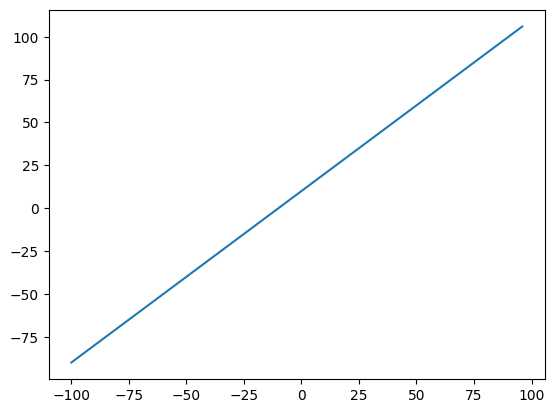

In [23]:
# Visualise the data
import matplotlib.pyplot as plt

plt.plot(X,y)

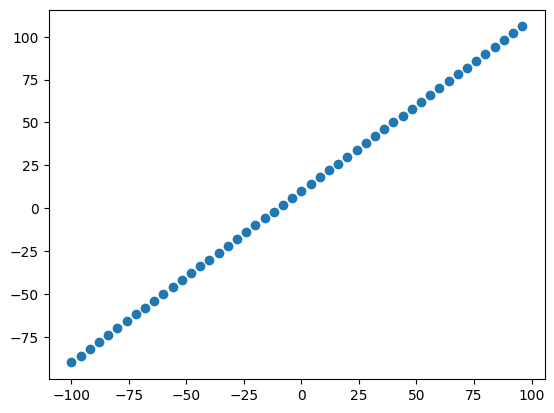

In [24]:
plt.scatter(X,y)

### The 3 sets...

* **Training set**- The model learns form this data, which is typically 70 to 80 percent of the total data
* **Validation set** - model getstuned on this data, which is typicall 10-15% of the data available
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available


* *Generalization* -  The ability for a machine learning model to perform well on the data it has never seen before

In [25]:
#Check the length of how many samples we have
len(X)

50

In [26]:
#split the data into train and test sets

X_train = X[:40] #we are working with 50 samples so we take the first 40 samples meand the 80 percent of X 
y_train = y[:40]

X_test = X[40:] #last 10 samples for test (20%)
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data into training and testing sets....let's visualize it

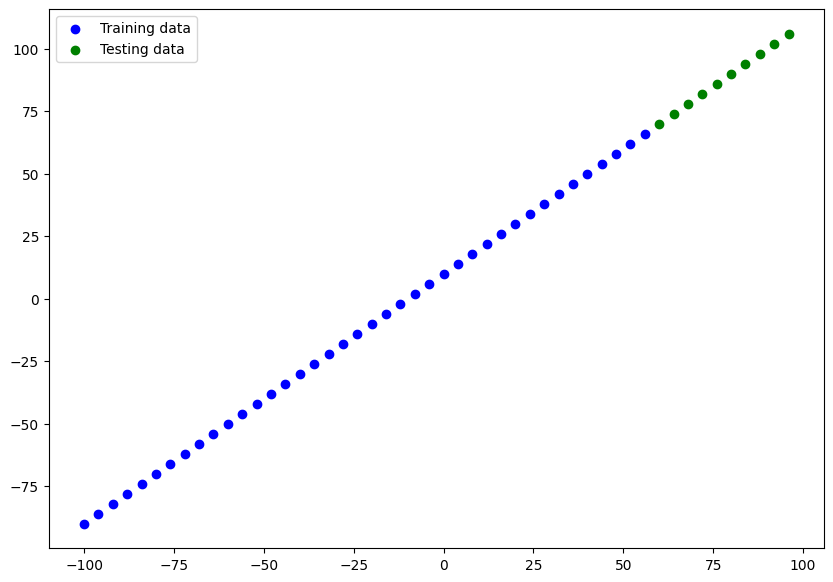

In [27]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

##3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100)


### Visualizing the model

In [29]:
X[0].shape #It is a scalar value

TensorShape([])

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the fist layer
tf.random.set_seed(42)

#Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1]), #Input shape varies depending on the number of inputs and outputs
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [31]:
model.summary()
#Thre are 2 params per hidden units

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total numbers of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-Trainable Params - these parameters aren't updated during training (This is typical when you bring in already lern patterns or parameters from other models during **transfer learning**)

In [32]:
#Lets fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) #0 verbose doesnt gives any output, if we set it to 1we can see our model train (default is 1)

In [33]:
# Get a summary of our model
model.summary()
#Sequential and dense in the summary increases everytime we instanciate the model or call it
#also total parameters = 20 (as we have 10 hidedn units)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Another way to visualise the model
from tensorflow.keras.utils import plot_model


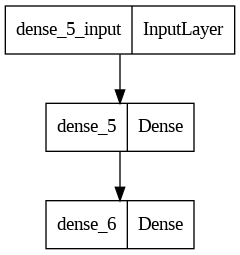

In [35]:
plot_model(model=model)

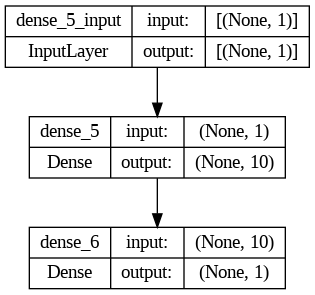

In [36]:
plot_model(model=model,show_shapes=True)

### Visualizing our models predictions.

* TO visualizing the predictions it is a good idea to plot them against the real labels.

In [37]:
# Make Some Predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 163ms/step


array([[ 75.90635 ],
       [ 80.85046 ],
       [ 85.794556],
       [ 90.73867 ],
       [ 95.68278 ],
       [100.626884],
       [105.57099 ],
       [110.51508 ],
       [115.4592  ],
       [120.403305]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
# Lets create a plotting function

def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  #PLot training data to blue
  plt.scatter(train_data,train_labels,c="blue",label="Training Data")
  #Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  #Plot models predictions in red
  plt.scatter(test_data,predictions,c="red",label="Predictions")
  #legend
  plt.legend();

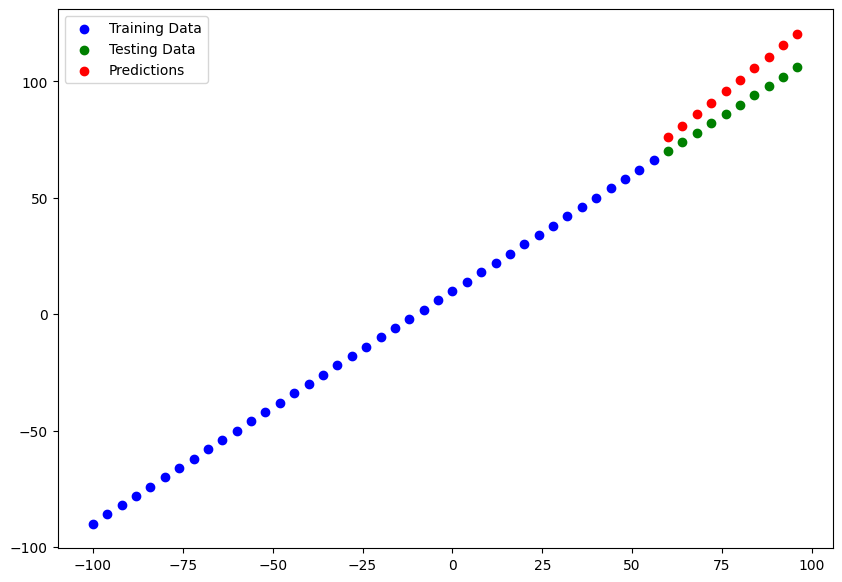

In [40]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)
#We have some good predictions.

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be differnt evaluation metrics to evaluate your model's performances.

Since we are working on regression, we have two of the main metrics:
* MAE - mean absolute error - "on average how wrong is each of my model's predicions.
* MSE - mean square error, "Square the average errors"

In [41]:
# Evaluate the model on test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 328ms/step - loss: 10.1548 - mae: 10.1548


[10.154828071594238, 10.154828071594238]

In [42]:
#Calculate the mean_Squared_error
mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.constant(y_pred))

mae 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.656191 , 11.259817 , 10.041089 , 10.147734 , 11.473111 ,
       13.9761305, 17.656794 , 22.515083 , 27.459198 , 32.403305 ],
      dtype=float32)>

In [43]:
#y-test and y-pred are not of same shape
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [44]:
tf.squeeze(y_pred) #removing the extra one dimension

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.90635 ,  80.85046 ,  85.794556,  90.73867 ,  95.68278 ,
       100.626884, 105.57099 , 110.51508 , 115.4592  , 120.403305],
      dtype=float32)>

In [45]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.constant(tf.squeeze(y_pred)))

mae 

<tf.Tensor: shape=(), dtype=float32, numpy=10.154827>

In [46]:
#Lets make some functions for mae and mse
def mae(x,y):
  return tf.metrics.mean_absolute_error(y_true=x,
                                 y_pred=tf.constant(tf.squeeze(y))).numpy()

def mse(x,y):
  return tf.metrics.mean_squared_error(y_true=x,
                                       y_pred=tf.constant(tf.squeeze(y))).numpy()

## Running experiments to improve our model (BUILDING DIFFRENT MODELS)

#### Build Model 1

In [47]:
#Creating a new model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 19.3646 - mae: 19.3646
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 11.3068 - mae: 11.3068
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 11.2090 - mae: 11.2090
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 9.5981 - mae: 9.5981
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 10.5132 - mae: 10.5132
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 9.7336 - mae: 9.7336
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 8.8233 - mae: 8.8233
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 9.0611 - mae: 9.0611
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 19.3935 - mae: 19.3935
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 10.4679 - mae: 10.4679
Epoch 11/100
2/2 [==============================] - 0s 13

1/1 [==============================] - 0s 48ms/step


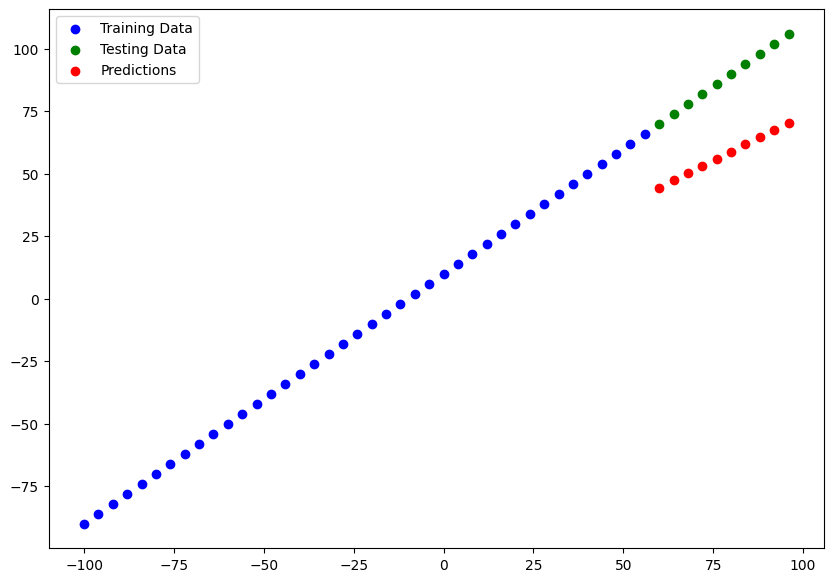

In [48]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)
#Not too good model

In [49]:
#Calculate model_! evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)

mae_1, mse_1

(30.53165, 942.5355)

### Model_2

In [50]:

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics=["mae"])

model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 42.6318 - mae: 42.6318
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 32.4933 - mae: 32.4933
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 37.3744 - mae: 37.3744
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 24.4773 - mae: 24.4773
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5449 - mae: 14.5449
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6153 - mae: 11.6153
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.6831 - mae: 12.6831
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0597 - mae: 11.0597
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 39.8898 - mae: 39.8898
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.3582 - mae: 27.3582
Epoch 11/100
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 125ms/step


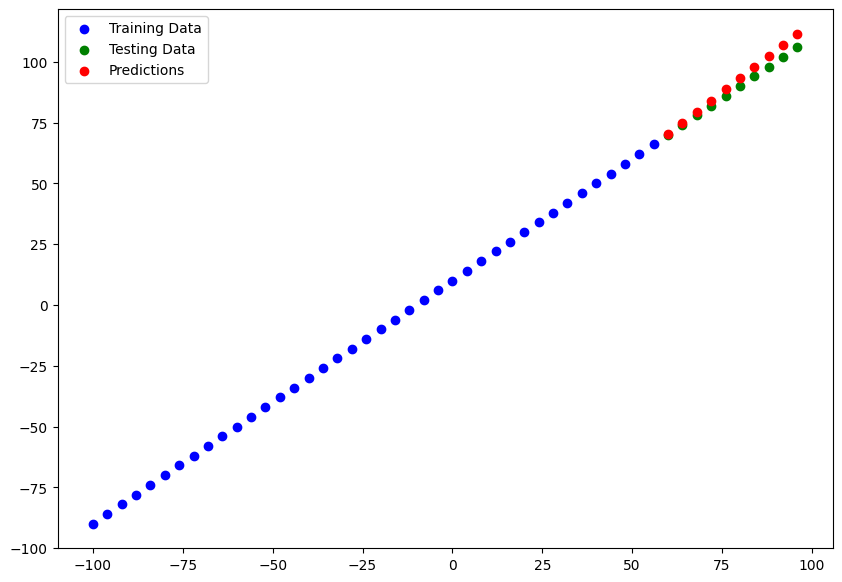

In [51]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [52]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(2.9296317, 11.31662)

## Build Model 3

In [58]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 17ms/step - loss: 44.6013 - mae: 44.6013
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 29.9773 - mae: 29.9773
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 34.7200 - mae: 34.7200
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 28.9212 - mae: 28.9212
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.6731 - mae: 15.6731
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.4258 - mae: 12.4258
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 11.6966 - mae: 11.6966
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.0792 - mae: 12.0792
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 37.8579 - mae: 37.8579
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 25.4695 - mae: 25.4695
Epoch 11/500
2/2 [==============================] - 

1/1 [==============================] - 0s 56ms/step


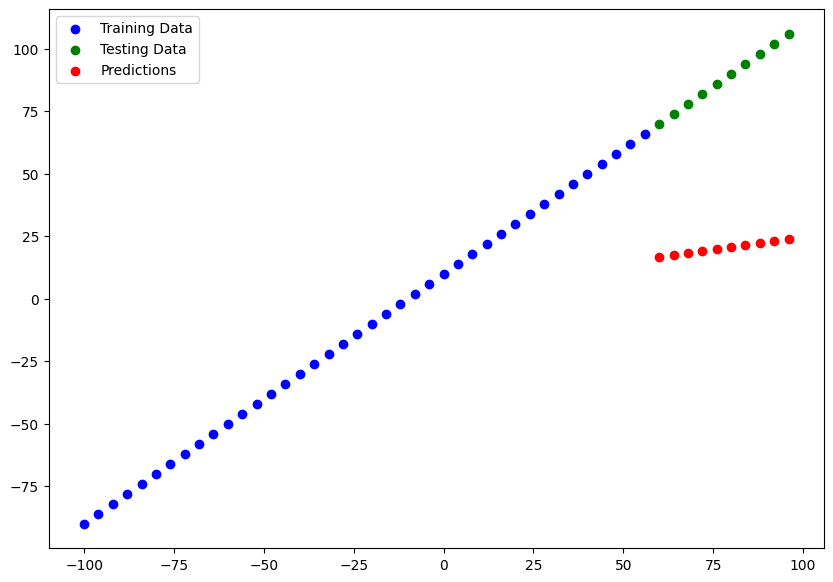

In [59]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)
#Our model was trained for too long - means longer epochs doesnot means always that it will be better.

In [60]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(67.788994, 4679.687)

# Comparing the results of our experiments

In [61]:
# Lets compare our models results using pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]


all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,30.531651,942.535522
1,model_2,2.929632,11.316620
2,model_3,67.788994,4679.687012


## Tracking your experiments

* One really good habits in ML is to track the results of your experiments.
* There are tools to help us


## Saving our model

* Saving our moedl alows us to use them outside colab or wherever they are trained such as a web app or mobile app.

* There are 2 main formats
1. Save Model Format
2. The HDF5 format 

In [62]:
# Save a model using saved model format
model_2.save("first_neuralnetwork_model")

In [63]:
#Save model to HDF5 format
model_2.save("HDF5.h5")

In [64]:
#Loading our model (SAVEDFORMAT)
new_model_saved_format = tf.keras.models.load_model("/content/first_neuralnetwork_model")
new_model_saved_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_2.summary() #The same model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
